## Time series power consumption predictions

Using pycaret for predicting power consumption in Norwegian cities based on weather data.

#### How to start

Create virtual environment, use python3 on macOS:  
python -m venv venv

Activate virtual environment. The path is venv/bin/activate on macOS:  
source venv/Scripts/activate

Upgrade pip:  
pip install --upgrade pip

Install dependencies:  
pip install -r prediction/requirements.txt 



In [4]:
location = 'oslo'
predict_hours = 72

start_time = '2022-04-10 21:00:00'
end_time = '2022-04-25 21:00:00'

In [5]:
import pandas as pd

start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

df = pd.read_csv('consumption_temp.csv')
# filter data for Oslo into new dataframe
data = df[df['location'] == location]
data['Date'] = pd.to_datetime(data['time'])

# Include only data between start_time and end_time
data = data[(data['Date'] >= start_time) & (data['Date'] <= end_time)]

/var/folders/b8/_z1mzr2n2t9052ycwkzgt15r0000gn/T/ipykernel_77978/2867570131.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['time'])


In [6]:
data.dtypes

time                   object
location               object
consumption           float64
temperature           float64
Date           datetime64[ns]
dtype: object

In [7]:
data.set_index('Date', inplace=True, drop=True)

<AxesSubplot: xlabel='Date'>

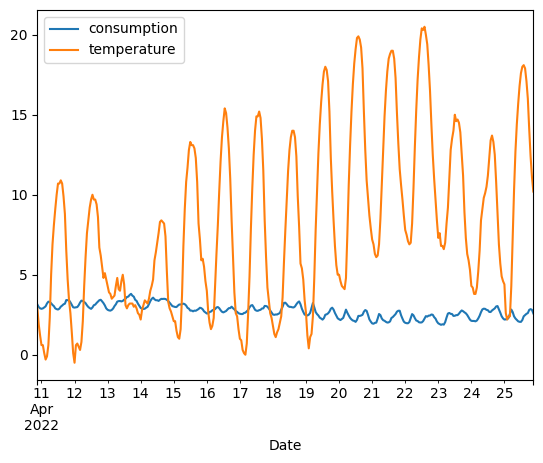

In [8]:
data.plot()

In [9]:
from pycaret.time_series import *

data = data[['consumption', 'temperature']]

s = setup(data, fold=3, fh= predict_hours, session_id=123, target='consumption')

,Description,Value
0,session_id,123
1,Target,consumption
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(361, 2)"
5,Transformed data shape,"(361, 2)"
6,Transformed train set shape,"(289, 2)"
7,Transformed test set shape,"(72, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [10]:
plot_model()

In [11]:
#best = compare_models()
best = compare_models(include=['huber_cds_dt', 'arima', 'omp_cds_dt'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.9180,0.8774,0.1792,0.2306,0.0642,0.0636,0.0955,0.6833
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.5280,1.3470,0.2895,0.3471,0.1079,0.0999,-1.2629,1.7767
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.6206,1.4510,0.3068,0.3733,0.1157,0.1053,-1.6889,2.5600


In [12]:
predict_model(best, fh=predict_hours)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,1.0038,0.8890,0.1913,0.2339,0.0756,0.0782,0.4037


,y_pred
2022-04-22 22:00,2.1662
2022-04-22 23:00,1.9956
2022-04-23 00:00,1.9378
2022-04-23 01:00,1.8899
2022-04-23 02:00,1.9061
...,...
2022-04-25 17:00,2.4204
2022-04-25 18:00,2.4397
2022-04-25 19:00,2.4889
2022-04-25 20:00,2.4416


In [13]:
plot_model(best, plot='train_test_split')

In [14]:
# Forecasting 72 hours into the future
plot_model(best, plot='forecast', data_kwargs={'fh': predict_hours})